In [1]:
import cv2 #importOpenCV
from matplotlib import pyplot as plt #import mathplotlib

def get_figsize(im):
    # What size does the figure need to be in inches to fit the image?
    dpi = plt.rcParams['figure.dpi']
    dim = im.shape
    figuresize = dim[1]/float(dpi), dim[0]/float(dpi)
    return(figuresize)
def display_image_actual_size_single(im_data):
    figuresize = get_figsize(im_data)
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figuresize)
    # Add the single axis to fit the image to the screen boundary
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(im_data, cmap='gray')
    ax.axis('off')
    plt.show()
    return(fig)
def display_image_actual_size_double(im_data1,im_data2):
    # assuming that the two input images have the same dimension and shape
    # then, we calculate figsize from one of the two images
    figuresize = get_figsize(im_data1)
    # Create a figure of the right size that can accommodate two images side-by-side
    fig = plt.figure(figsize=(figuresize[0],figuresize[1]*2+.1))
    ax1 = fig.add_axes([0,0,1,1])
    ax1.imshow(im_data1, cmap='gray')
    ax1.axis('off')
    ax2 = fig.add_axes([1.1,0,1,1])
    ax2.imshow(im_data2, cmap='gray')
    ax2.axis('off')
    return(fig)

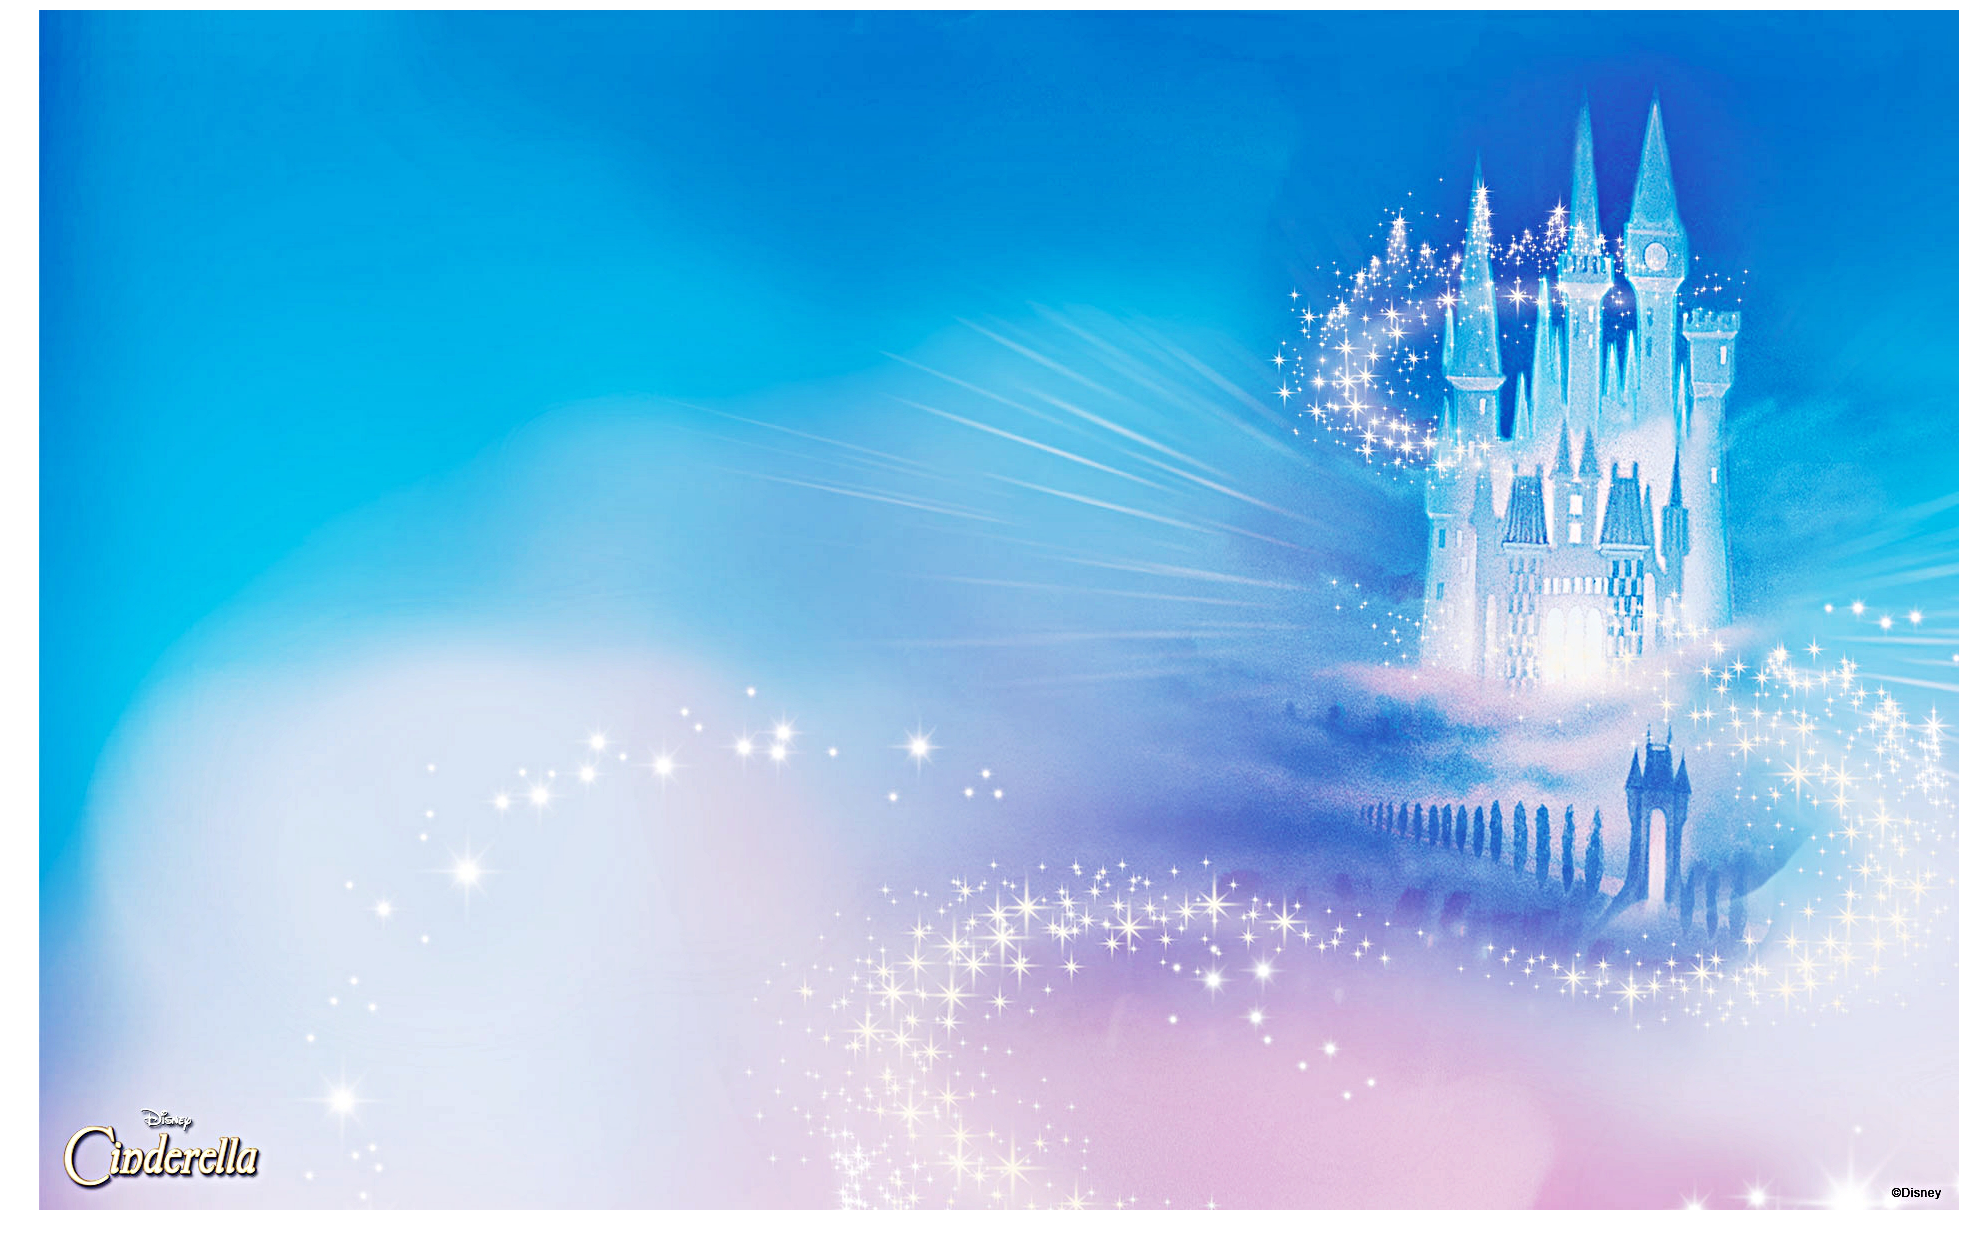

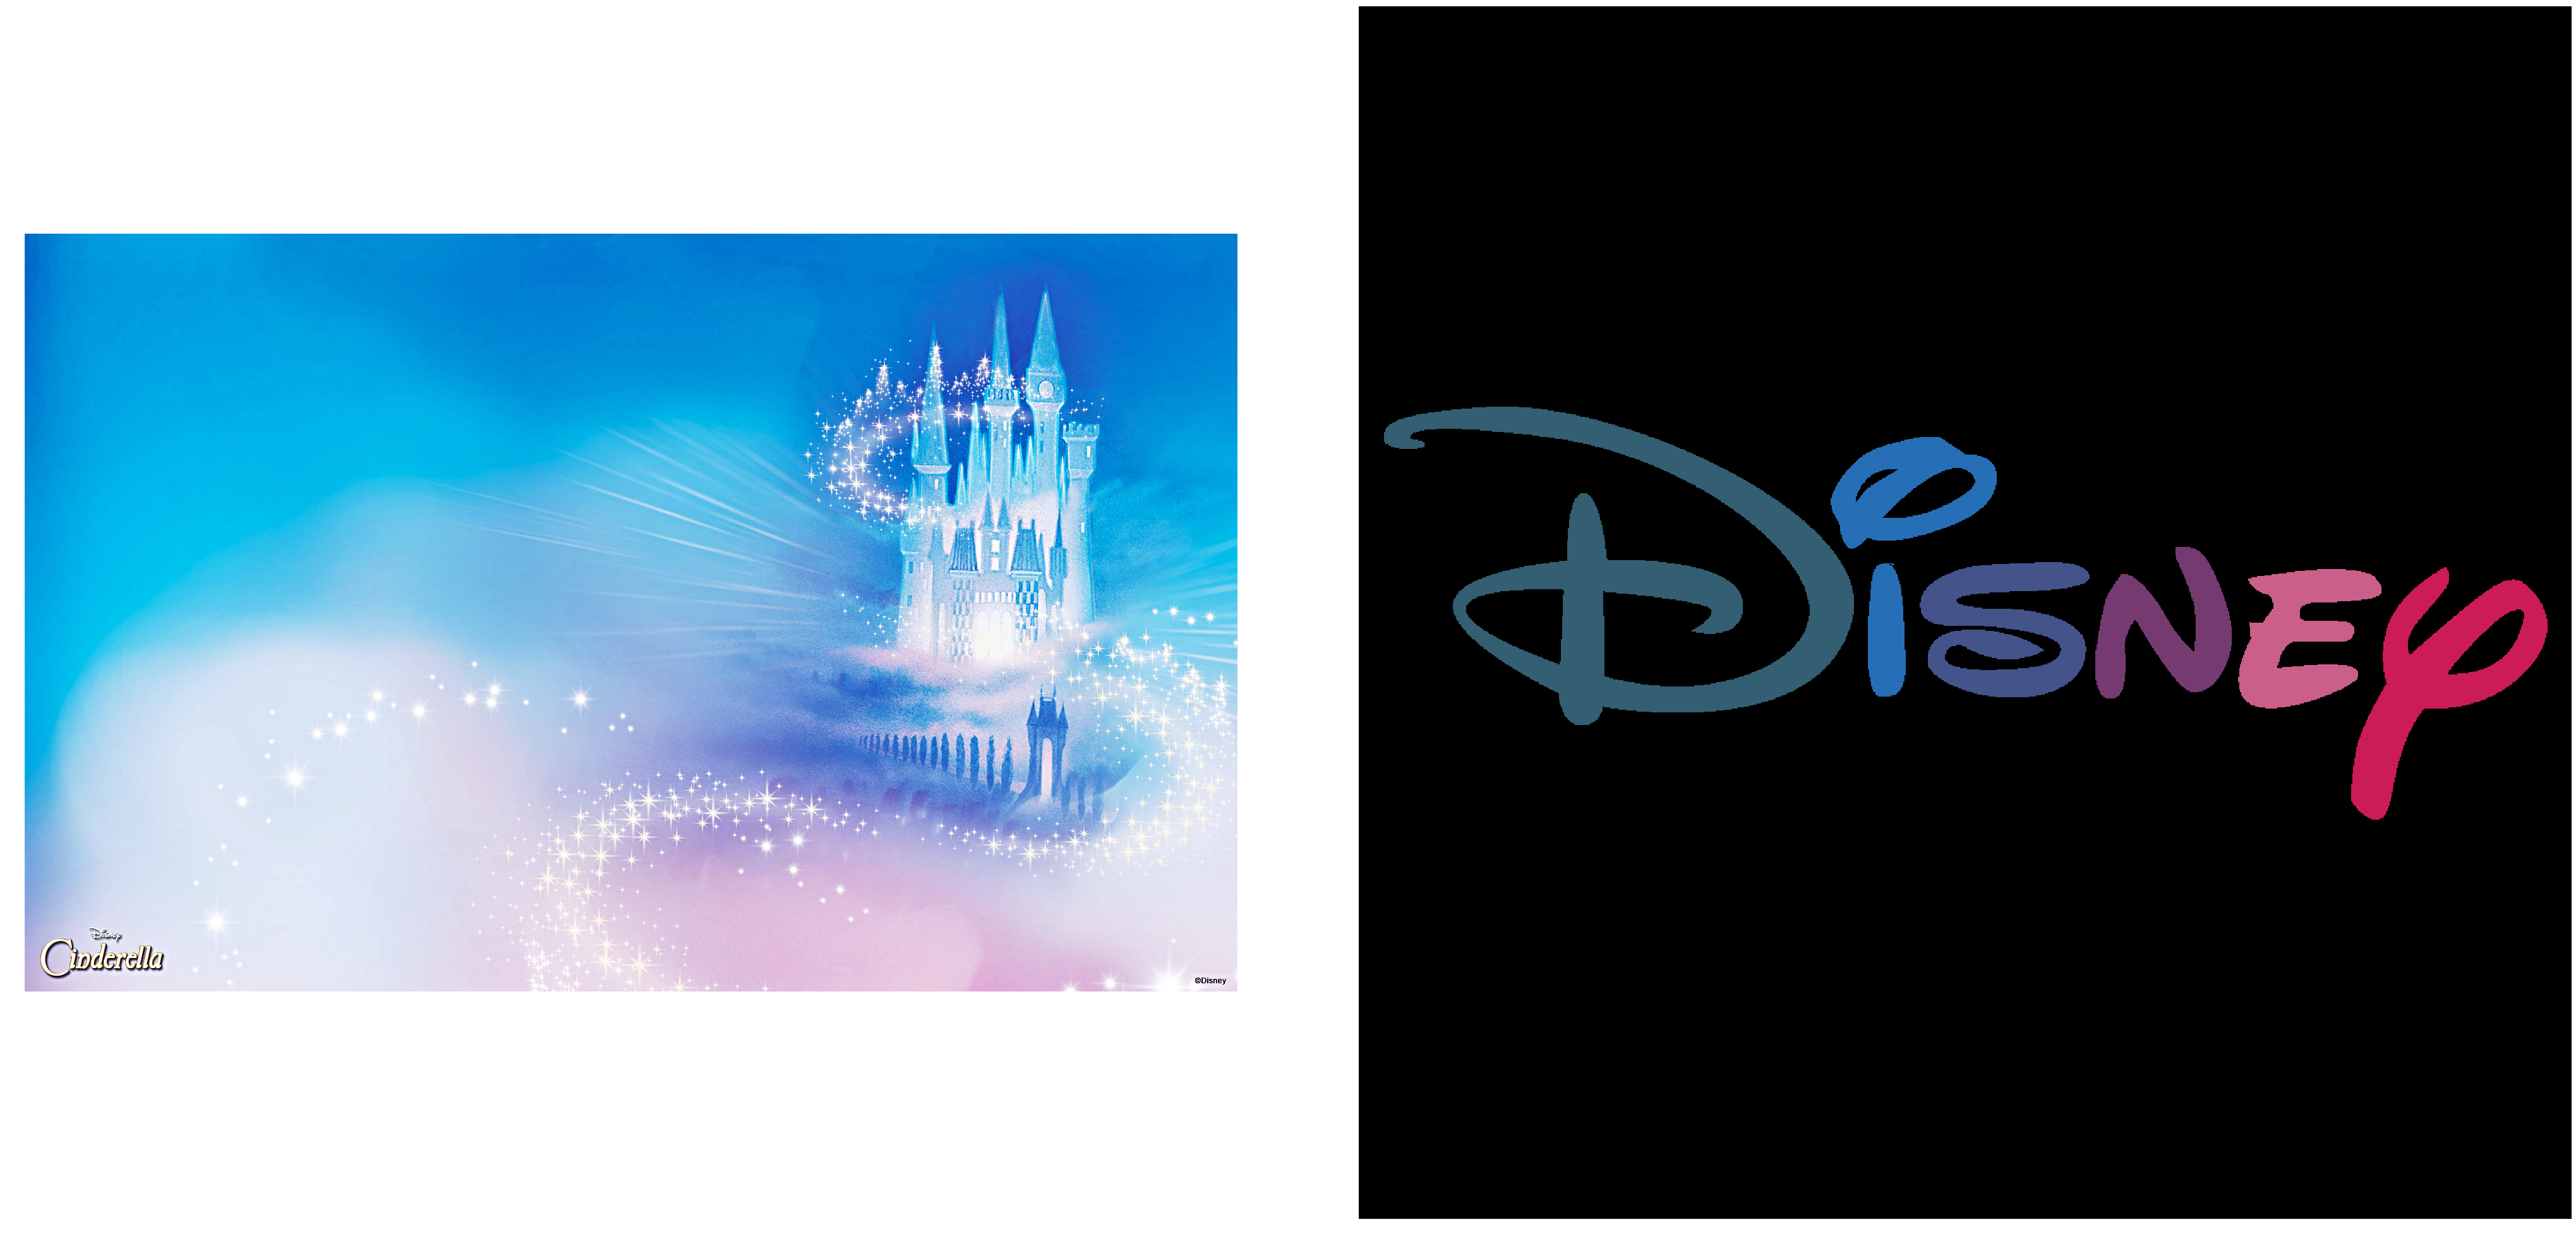

In [2]:
bgC = cv2.imread('background.jpg')
bg = cv2.cvtColor(bgC, cv2.COLOR_BGR2RGB)
logoC = cv2.imread('logo.png')
logo = cv2.cvtColor(logoC, cv2.COLOR_BGR2RGB)
fig = display_image_actual_size_single(bg)
fig = display_image_actual_size_double(bg, logo)

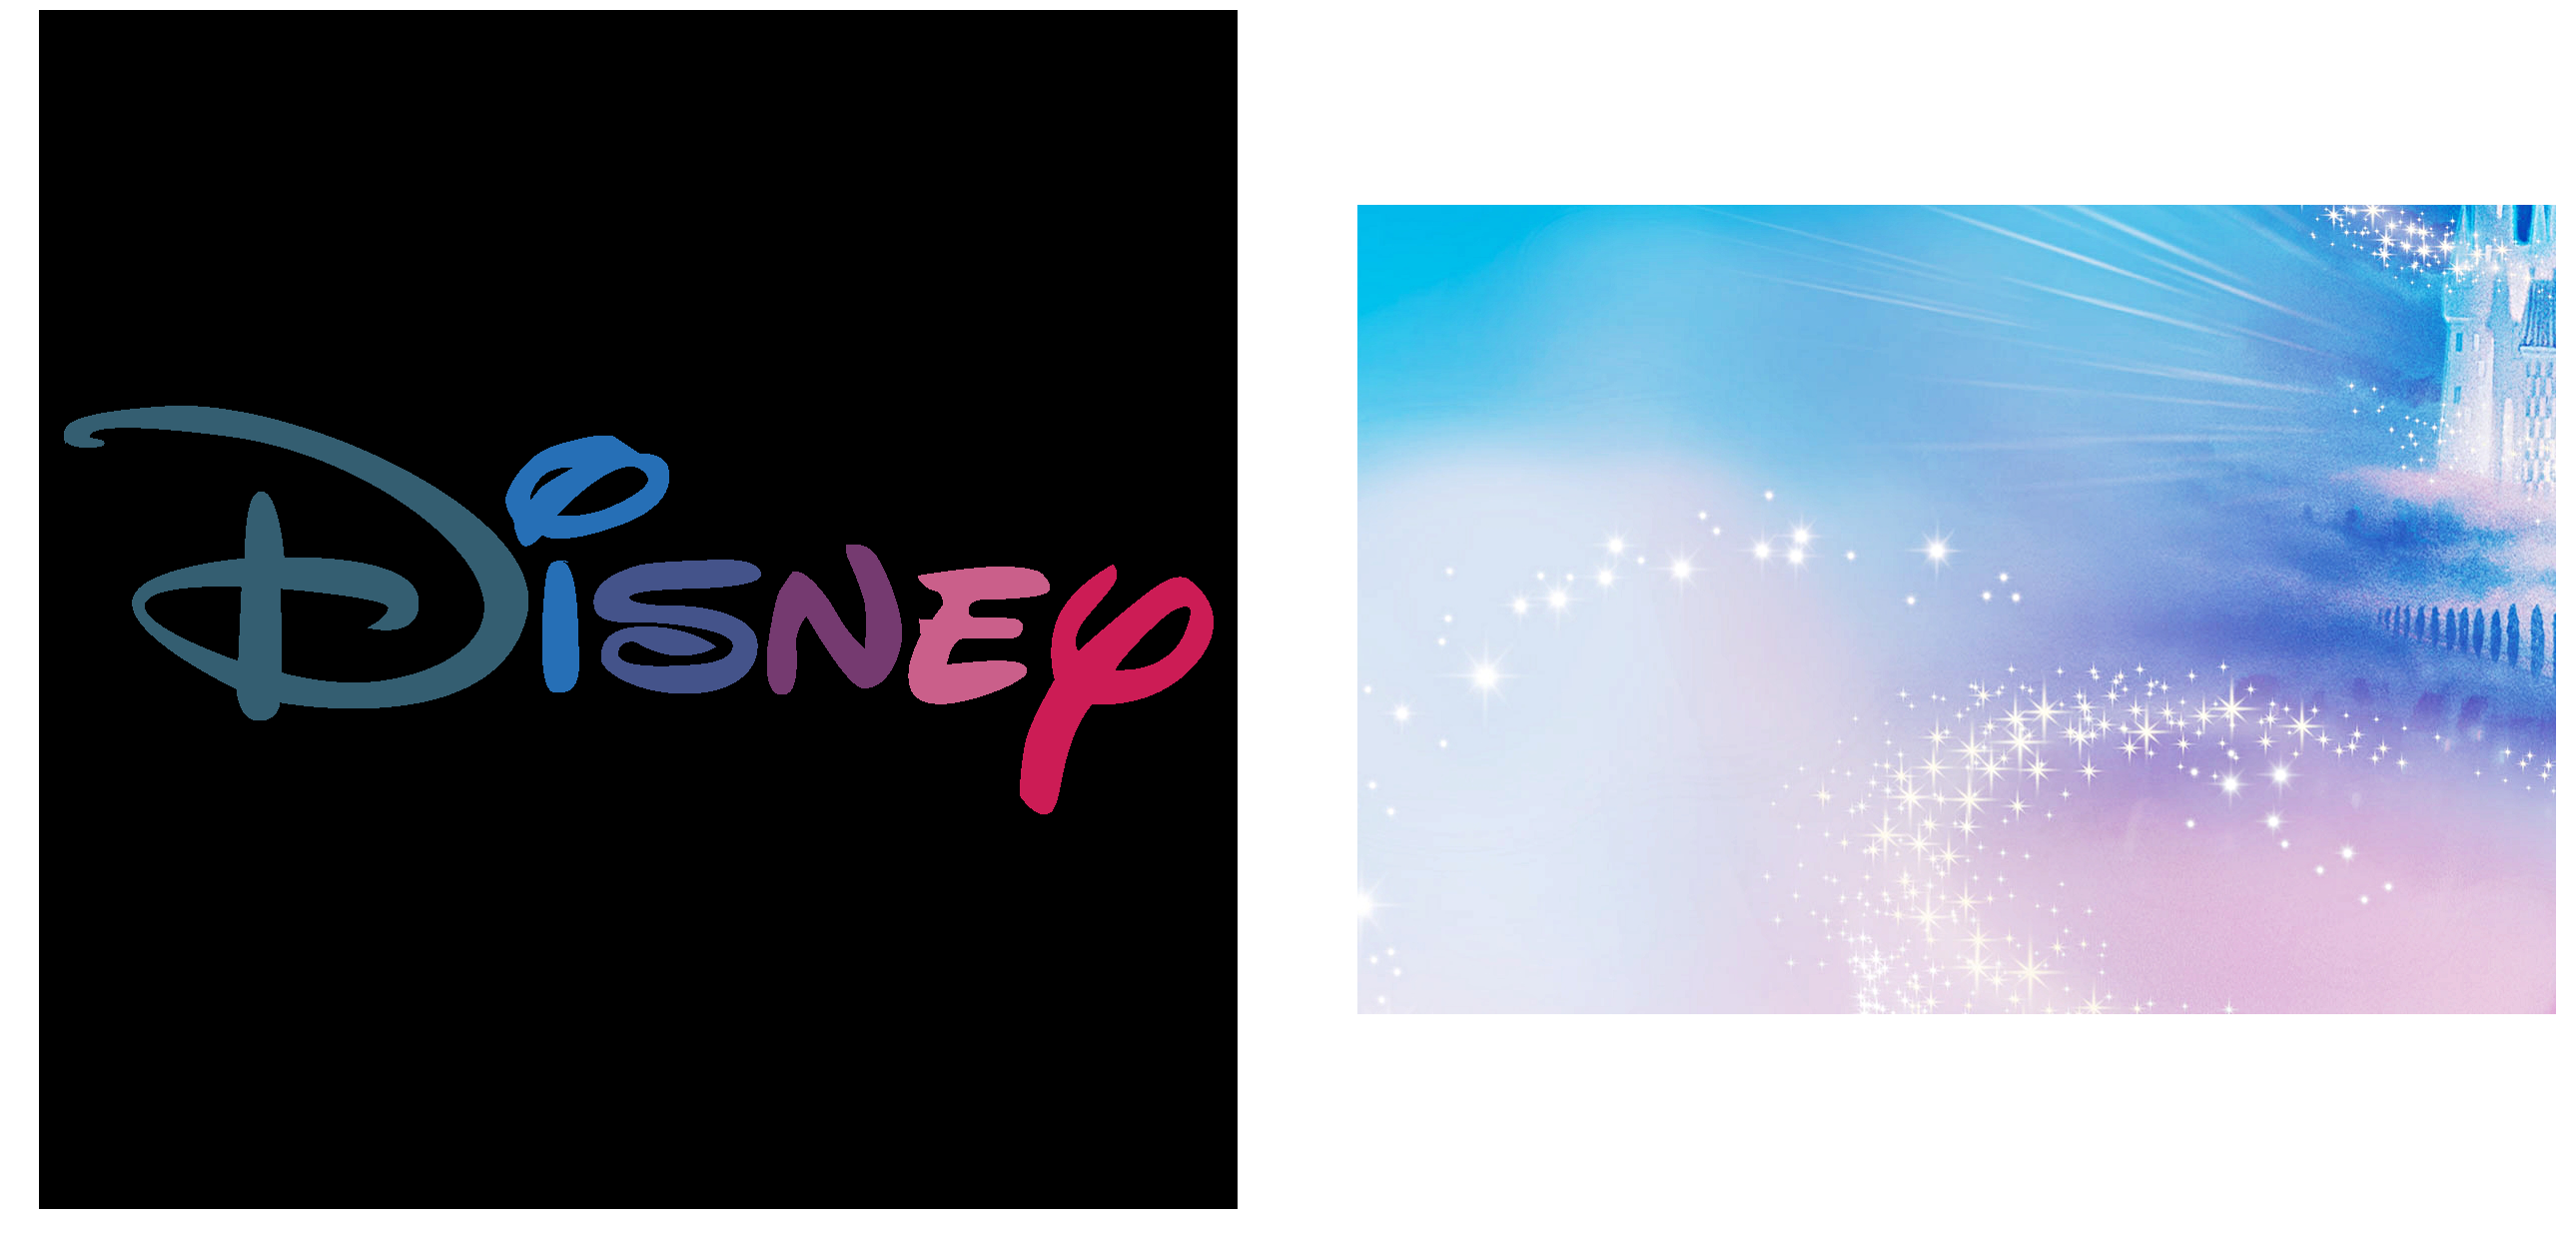

In [3]:
rows, cols, channels = logo.shape       #get the width, the height, and the channels of fg
roi = bg[390:390+rows, 300:300+cols]  #cut from bg the roi of the same dimesions as fg
show = display_image_actual_size_double(logo, roi)
show.savefig("Lab3Ex1.jpg", bbox_inches='tight')

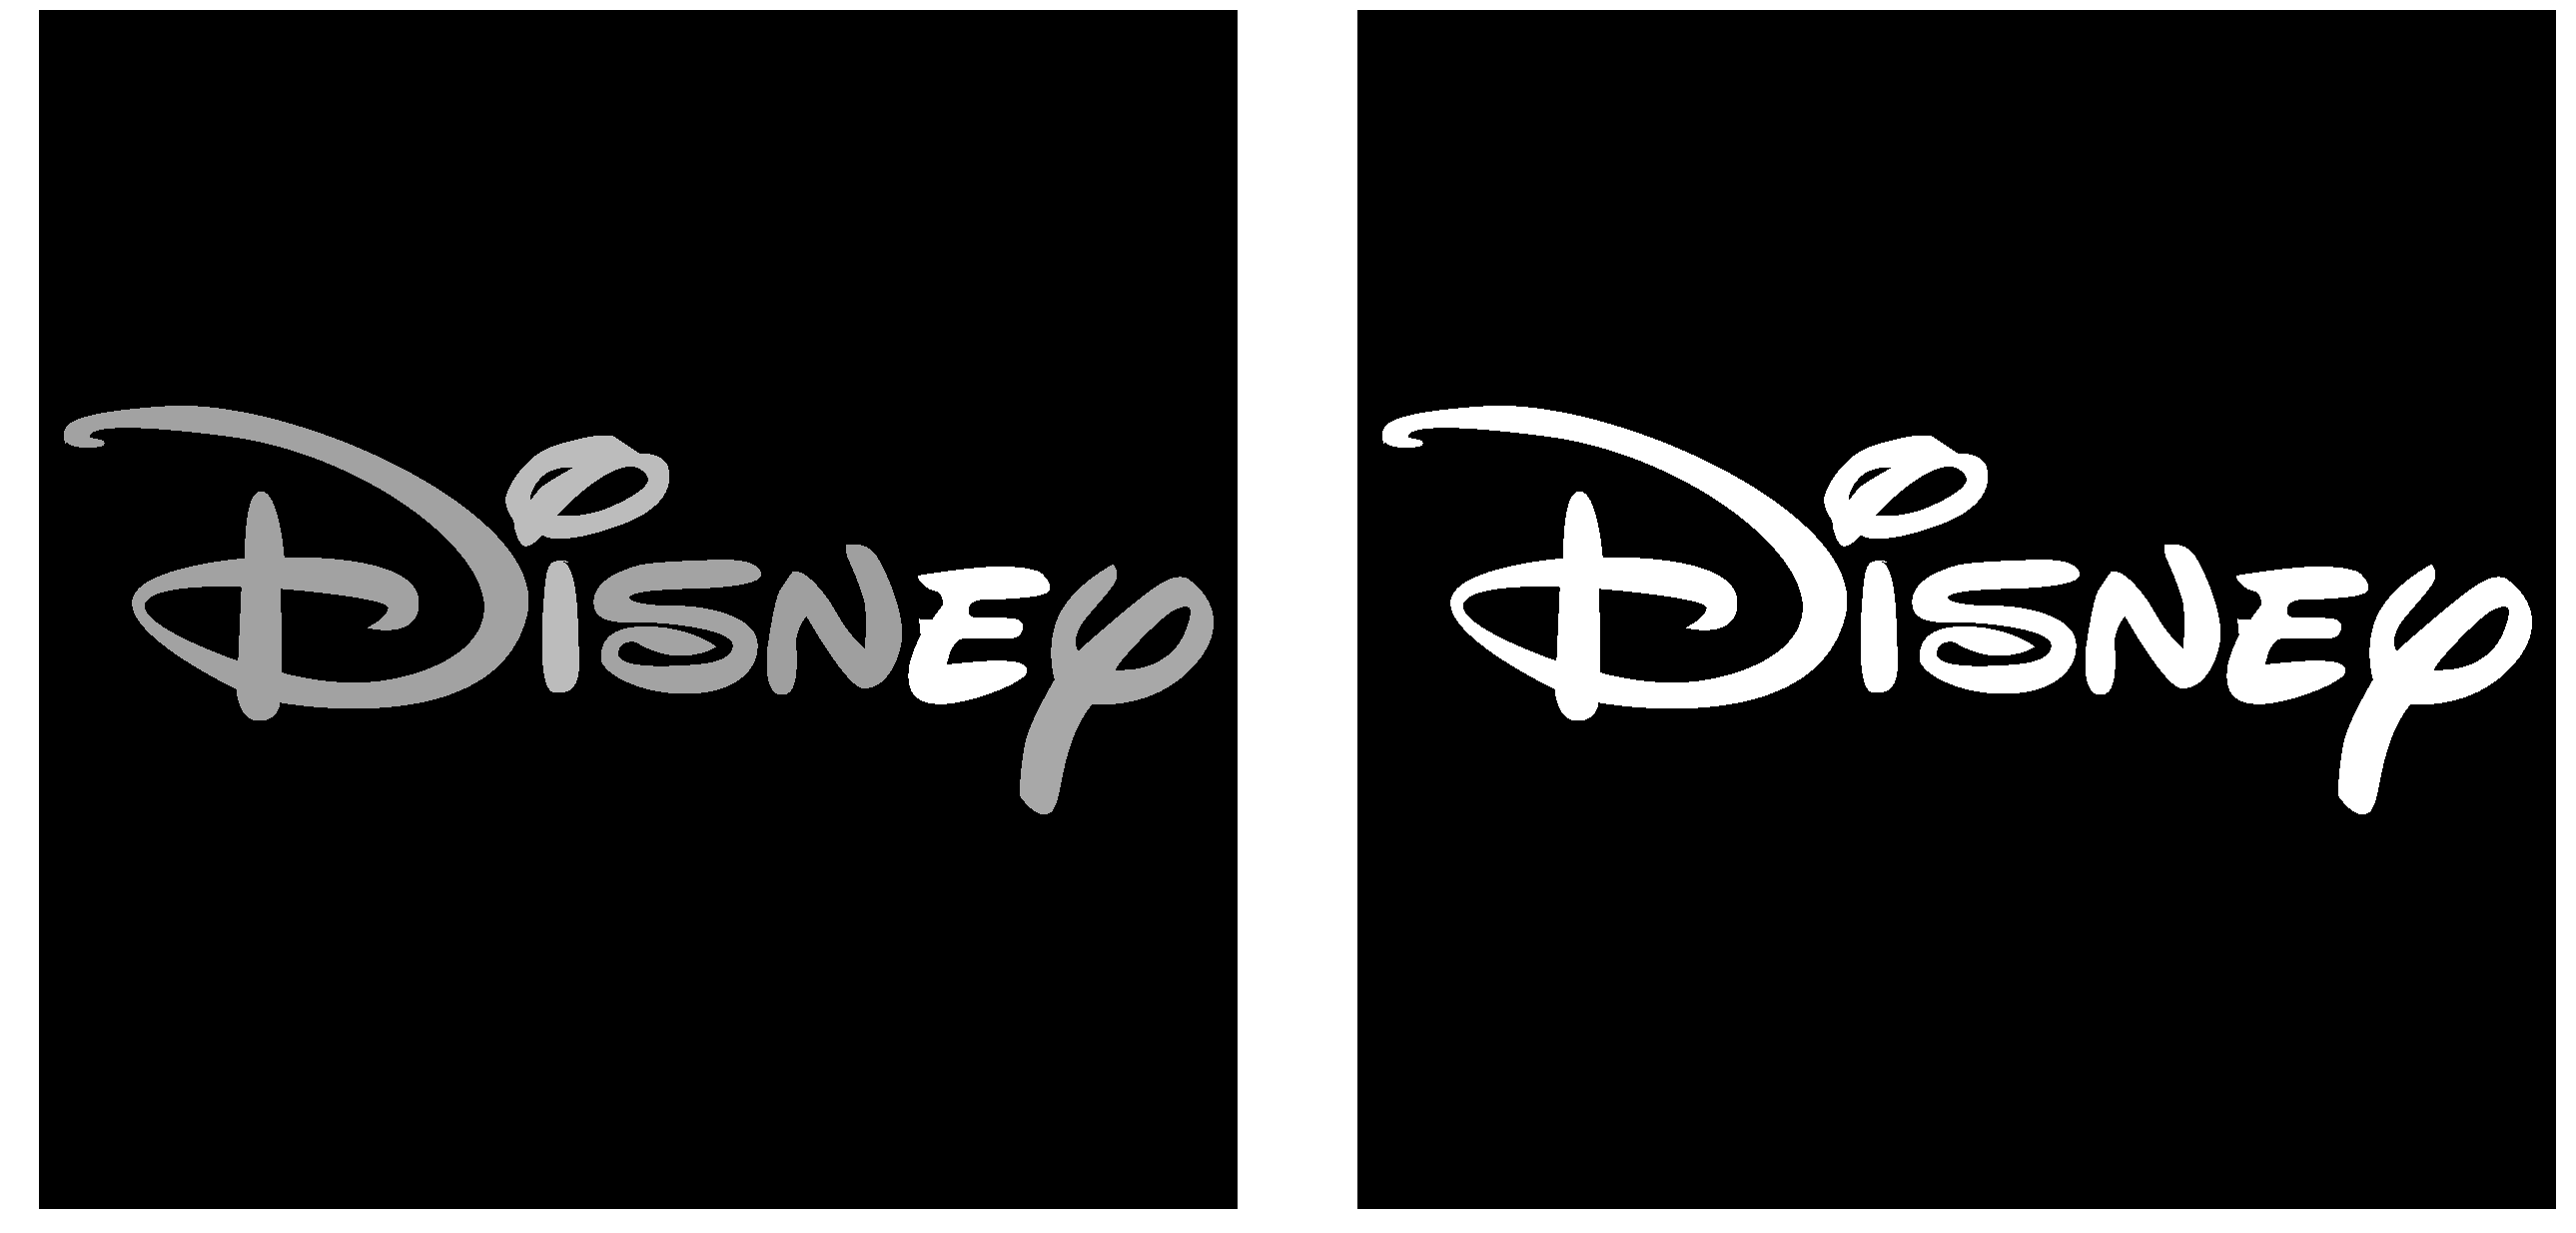

In [4]:
fgGrayscale = cv2.cvtColor(logoC, cv2.COLOR_BGR2GRAY)
thres = 30
retval, mask = cv2.threshold(fgGrayscale, thres, 255, cv2.THRESH_BINARY)
show = display_image_actual_size_double(fgGrayscale,mask)
show.savefig("Lab3Ex2.jpg", bbox_inches='tight')

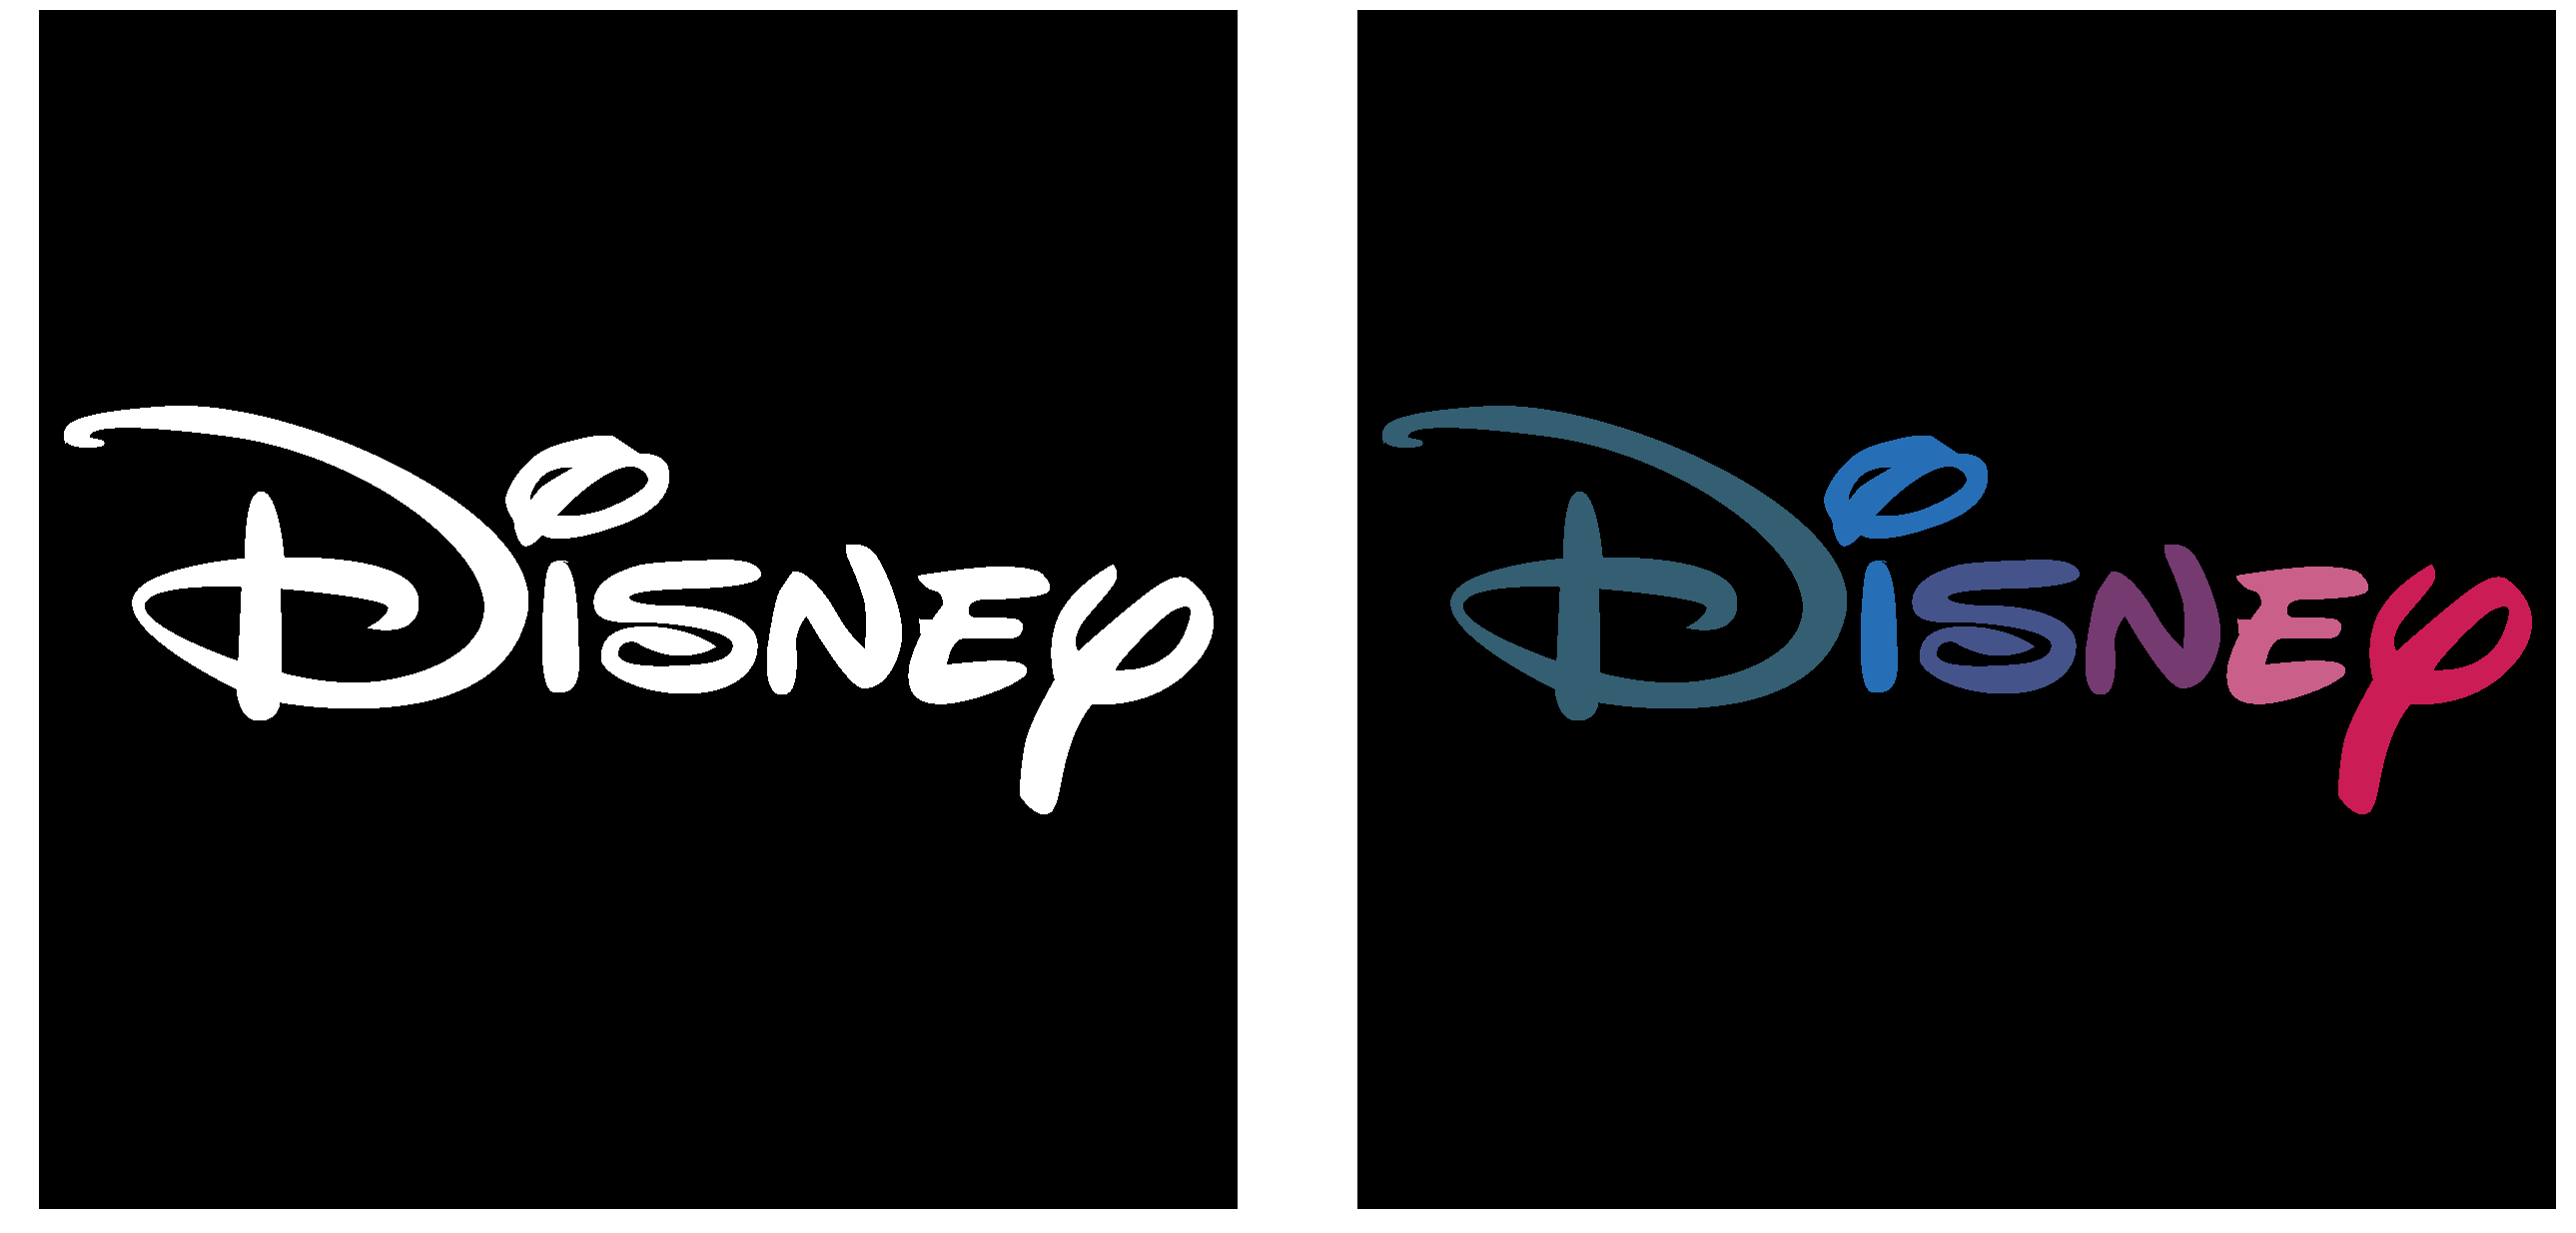

In [5]:
result = cv2.bitwise_and(logo, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))
show = display_image_actual_size_double(mask,result)

In [6]:
mask = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR);
result2 = cv2.bitwise_and(roi,mask);
print(roi)
print(mask)
show = display_image_actual_size_single(roi);
fig = display_image_actual_size_double(mask,result2);



error: OpenCV(3.4.4) ../modules/core/src/arithm.cpp:229: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'
